In [1]:
# Change accordingly
import sys
sys.path.insert(0, "..")

In [3]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from isvd import face_interval_generator as fgen
from tqdm import tqdm

# Scratch

In [4]:
data = scipy.io.loadmat("../isvd/data/ORL_64x64.mat")

In [5]:
all_faces = []
single_faces = []
for idx in range(400):
    face = data['fea'][idx,:].reshape(64,64).T
    single_faces.append(face)
    if (idx+1) % 10 == 0:
        all_faces.append(single_faces)
        single_faces = []

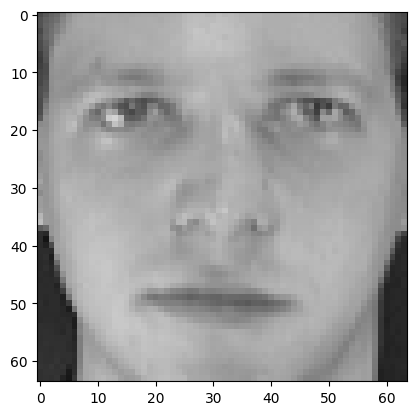

In [6]:
plt.imshow(all_faces[0][0], cmap="gray", vmin=0, vmax=255)

In [7]:
len(all_faces)

40

In [8]:
def within_array(arr,x,y):
    if x <= arr.shape[0]-1 and x <= arr.shape[0]-1:
        cond = True
    else:
        cond = False
    return cond

def get_neighbors(arr, i, j, r=1):
    neighbors = []
    for x in range(max(0, i-r), min(arr.shape[0], i+r+1)):
        for y in range(max(0, j-r), min(arr.shape[1], j+r+1)):
            if (x,y) != (i,j) and np.abs(x-i) + np.abs(y-j) <= r*2 and within_array(arr,x,y):
                neighbors.append(arr[x,y])
    return neighbors

In [9]:
def neighbor_pixels(img, r):
    x = img.shape[0]
    y = img.shape[1]
    s = []
    for i in range(x):
        s_i = []
        for j in range(y):
            neighbors = get_neighbors(img, i, j, r)
            s_i.append(neighbors)
        s.append(s_i)
    
    return s

def delta_pixels(neighbors_array, alpha):
    x = len(neighbors_array)
    y = len(neighbors_array[0])

    arr = []
    for i in range(x):
        arr_i = []
        for j in range(y):
            delta_ij = np.std(neighbors_array[i][j]) * alpha
            arr_i.append(delta_ij)
        arr.append(arr_i)
    arr = np.array(arr)

    return arr


In [10]:
img = all_faces[0][0]
s = neighbor_pixels(img, 3)
delta = delta_pixels(s, 2)

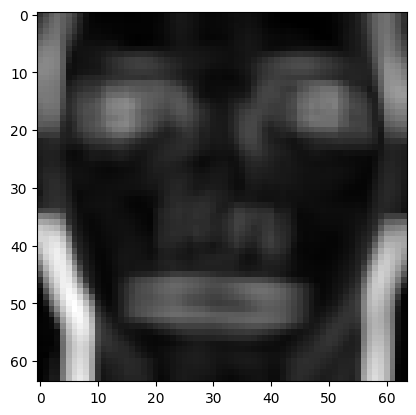

In [11]:
plt.imshow(delta, cmap="gray")

In [32]:
img_low = img - delta
img_up = img + delta

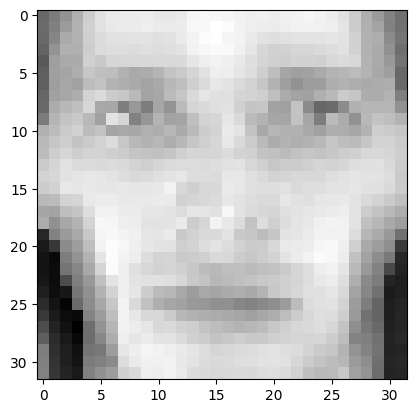

In [33]:
plt.imshow(img_low, cmap="gray")

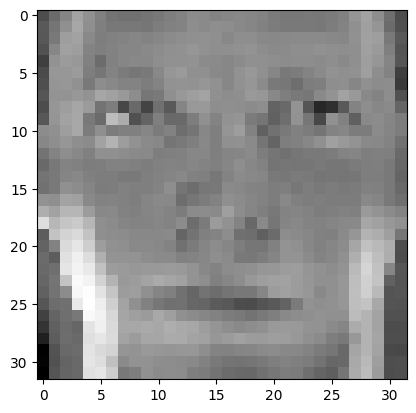

In [34]:
plt.imshow(img_up, cmap="gray")

In [25]:
img_low

array([[ 73.82659049,  85.67033218, 105.35411114, ..., -18.68642906,
        -38.60671525, -22.80311366],
       [ 83.31733749,  92.96307835, 122.23647491, ...,  -6.57433826,
        -40.81112918, -20.79195848],
       [ 94.68473075, 119.32124666, 137.53631857, ..., -18.59106684,
        -44.29300962, -27.45712789],
       ...,
       [169.79865182, 159.78882029, 151.94627393, ...,  29.4450794 ,
         29.6802591 ,  28.84237126],
       [167.67959764, 164.95097004, 161.43530901, ...,  34.1175531 ,
         35.58490594,  35.65223654],
       [168.83238535, 170.10532944, 168.19072187, ...,  28.32209473,
         28.58396274,  28.65079829]])

In [35]:
scipy.io.savemat("../data/intv_face.mat", {"lo": img_low, "up": img_up, "avg": img})

# Interval Face Generator

In [3]:
path = "../data/ORL_32x32.mat"
pix = 32
all_faces = fgen.face_loader(path, pix)

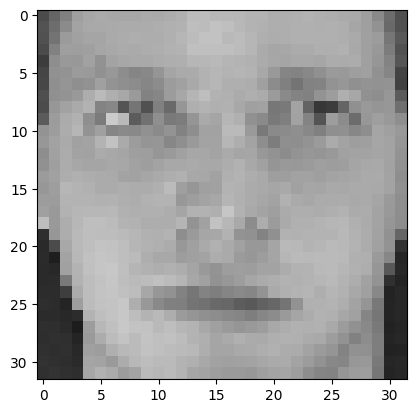

In [4]:
plt.imshow(all_faces[0][0], cmap="gray", vmin=0, vmax=255)

In [5]:
delta, img_low, img_up = fgen.compute_interval(all_faces[0][0], 3, 2)

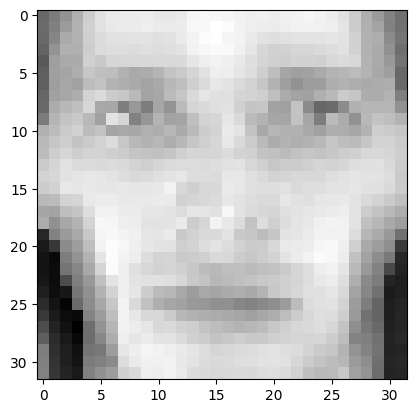

In [6]:
plt.imshow(img_low, cmap="gray")

In [8]:
faces_avg = []
faces_low = []
faces_up = []

for faces in tqdm(all_faces):
    temp_avg = []
    temp_low = []
    temp_up = []
    for face in faces:
        delta, img_low, img_up = fgen.compute_interval(face, 3, 2)
        temp_low.append(img_low.flatten())
        temp_up.append(img_up.flatten())
        temp_avg.append(face.flatten())
    faces_avg.append(temp_avg)
    faces_low.append(temp_low)
    faces_up.append(temp_up)

100%|██████████| 40/40 [00:24<00:00,  1.65it/s]


In [15]:
average_faces = np.concatenate(faces_avg)
low_faces = np.concatenate(faces_low)
up_faces = np.concatenate(faces_up)

In [16]:
scipy.io.savemat("../isvd/data/intv_faces.mat", {"lo": low_faces, "up": up_faces, "avg": average_faces})